<a href="https://colab.research.google.com/github/rodrigosantis1/simulation-production-systems/blob/main/Pr%C3%A1tica_1_Din%C3%A2mica_de_uma_Fila_Resolvido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
navios = list(range(1, 15))
chegadas = [10, 2, 13, 7, 2, 8, 8, 10, 9, 1, 14, 14, 1, 10]
carregamento = [5, 5, 3, 3, 6, 7, 6, 8, 2, 5, 8, 8, 3, 4]

df = pd.DataFrame({'Navio': navios, 'Intervalo_Chegada': chegadas, 'Duracao_Carregamento': carregamento})

display(df)

,Navio,Intervalo_Chegada,Duracao_Carregamento
0,1,10,5
1,2,2,5
2,3,13,3
3,4,7,3
4,5,2,6
5,6,8,7
6,7,8,6
7,8,10,8
8,9,9,2
9,10,1,5


In [3]:
# Calculando os momentos de chegada
df['Chegada'] = df['Intervalo_Chegada'].cumsum()

# Inicializando colunas de carregamento
df['Inicio_Carregamento'] = 0
df['Fim_Carregamento'] = 0

for i in range(len(df)):
    if i == 0:
        df.loc[i, 'Inicio_Carregamento'] = df.loc[i, 'Chegada']
    else:
        df.loc[i, 'Inicio_Carregamento'] = max(df.loc[i, 'Chegada'], df.loc[i-1, 'Fim_Carregamento'])
    df.loc[i, 'Fim_Carregamento'] = df.loc[i, 'Inicio_Carregamento'] + df.loc[i, 'Duracao_Carregamento']

# Criando o tempo na fila
df['Tempo_Fila'] = df['Inicio_Carregamento'] - df['Chegada']

display(df)

,Navio,Intervalo_Chegada,Duracao_Carregamento,Chegada,Inicio_Carregamento,Fim_Carregamento,Tempo_Fila
0,1,10,5,10,10,15,0
1,2,2,5,12,15,20,3
2,3,13,3,25,25,28,0
3,4,7,3,32,32,35,0
4,5,2,6,34,35,41,1
5,6,8,7,42,42,49,0
6,7,8,6,50,50,56,0
7,8,10,8,60,60,68,0
8,9,9,2,69,69,71,0
9,10,1,5,70,71,76,1


<ipython-input-4-9371d67ff136>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(df))


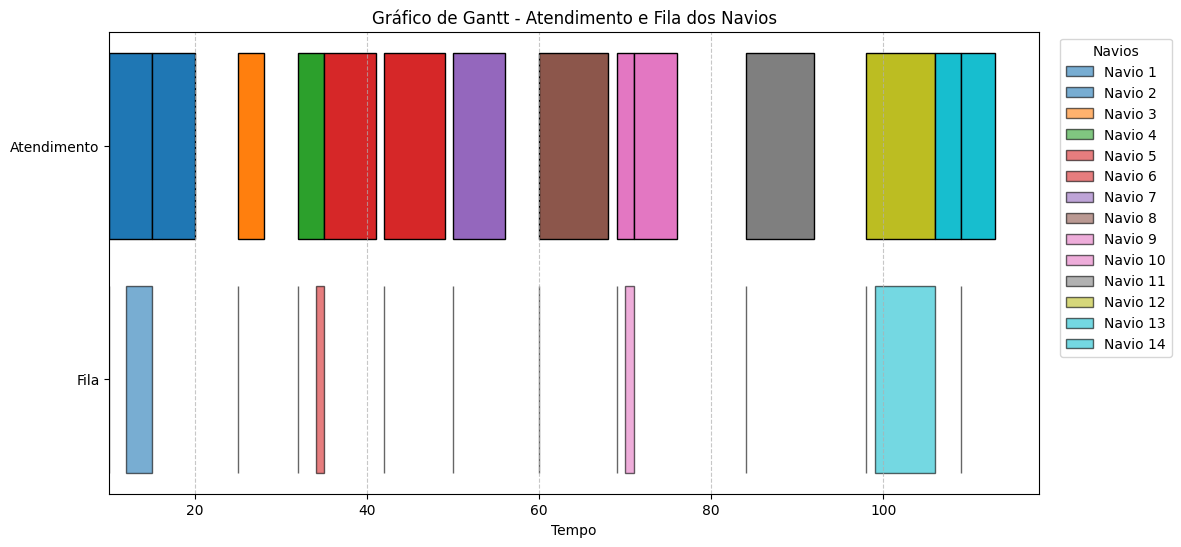

In [4]:
# Criando gráfico de Gantt com duas linhas: Atendimento e Fila
fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.get_cmap("tab10", len(df))

for i in range(len(df)):
    color = colors(i)
    ax.barh("Fila", df.loc[i, 'Tempo_Fila'], left=df.loc[i, 'Chegada'], color=color, edgecolor='black', alpha=0.6, label=f'Navio {df.loc[i, "Navio"]}' if i < len(df) else "")
    ax.barh("Atendimento", df.loc[i, 'Duracao_Carregamento'], left=df.loc[i, 'Inicio_Carregamento'], color=color, edgecolor='black', alpha=1.0)

ax.set_xlabel("Tempo")
ax.set_title("Gráfico de Gantt - Atendimento e Fila dos Navios")
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title="Navios")
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [5]:
media_chegada = df['Intervalo_Chegada'].mean()
media_carregamento = df['Duracao_Carregamento'].mean()
media_fila = df['Tempo_Fila'].mean()

print("Intervalo médio entre as chegadas: {:.3}".format(media_chegada))
print("Taxa média entre chegadas: {:.3}".format(1/media_chegada))
print("A duração média do atendimento: {:.3}".format(media_carregamento))
print("Taxa média do atendimento: {:.3}".format(1/media_carregamento))
print("Tempo média de espera na fila: {:.3}".format(media_fila))

Intervalo médio entre as chegadas: 7.79
Taxa média entre chegadas: 0.128
A duração média do atendimento: 5.21
Taxa média do atendimento: 0.192
Tempo média de espera na fila: 0.857
